# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
data = pd.read_csv('globalterrorism.csv', encoding='ISO-8859-1')
data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,1.970010e+11,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,1.970010e+11,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,1.970010e+11,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,1.970010e+11,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,1.970010e+11,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


## Checking for Missing Values

In [3]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [4]:
# getting the required information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [5]:
data.shape # shape of the dataset

(181691, 135)

In [6]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## Creating a seperate dataset containing the required Information

In [7]:
df = data[['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'target1', 'nkill','success']]

In [8]:
df.head(10)

,eventid,iyear,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill,success
0,1.970000e+11,1970,7,2,Dominican Republic,Central America & Caribbean,0,Assassination,Private Citizens & Property,Julio Guzman,1.0,1
1,1.970000e+11,1970,0,0,Mexico,North America,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0,1
2,1.970010e+11,1970,1,0,Philippines,Southeast Asia,0,Assassination,Journalists & Media,Employee,1.0,1
3,1.970010e+11,1970,1,0,Greece,Western Europe,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,NaN,1
4,1.970010e+11,1970,1,0,Japan,East Asia,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,NaN,1
5,1.970010e+11,1970,1,1,United States,North America,0,Armed Assault,Police,Cairo Police Headquarters,0.0,1
6,1.970010e+11,1970,1,2,Uruguay,South America,0,Assassination,Police,Juan Maria de Lucah/Chief of Directorate of in...,0.0,0
7,1.970010e+11,1970,1,2,United States,North America,0,Bombing/Explosion,Utilities,Edes Substation,0.0,1
8,1.970010e+11,1970,1,2,United States,North America,0,Facility/Infrastructure Attack,Military,"R.O.T.C. offices at University of Wisconsin, M...",0.0,1
9,1.970010e+11,1970,1,3,United States,North America,0,Facility/Infrastructure Attack,Government (General),Selective Service Headquarters in Madison Wisc...,0.0,1


In [9]:
df.isnull().sum() # checking for missing values

eventid                0
iyear                  0
imonth                 0
iday                   0
country_txt            0
region_txt             0
suicide                0
attacktype1_txt        0
targtype1_txt          0
target1              638
nkill              10313
success                0
dtype: int64

In [10]:
# Handling the missing values

df['target1'] = df['target1'].fillna('Not Known')
df['nkill'] = df['nkill'].fillna(0)

In [11]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
country_txt        0
region_txt         0
suicide            0
attacktype1_txt    0
targtype1_txt      0
target1            0
nkill              0
success            0
dtype: int64

### Cleaned Dataset

In [12]:
df.head(10)

,eventid,iyear,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill,success
0,1.970000e+11,1970,7,2,Dominican Republic,Central America & Caribbean,0,Assassination,Private Citizens & Property,Julio Guzman,1.0,1
1,1.970000e+11,1970,0,0,Mexico,North America,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0,1
2,1.970010e+11,1970,1,0,Philippines,Southeast Asia,0,Assassination,Journalists & Media,Employee,1.0,1
3,1.970010e+11,1970,1,0,Greece,Western Europe,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,0.0,1
4,1.970010e+11,1970,1,0,Japan,East Asia,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,0.0,1
5,1.970010e+11,1970,1,1,United States,North America,0,Armed Assault,Police,Cairo Police Headquarters,0.0,1
6,1.970010e+11,1970,1,2,Uruguay,South America,0,Assassination,Police,Juan Maria de Lucah/Chief of Directorate of in...,0.0,0
7,1.970010e+11,1970,1,2,United States,North America,0,Bombing/Explosion,Utilities,Edes Substation,0.0,1
8,1.970010e+11,1970,1,2,United States,North America,0,Facility/Infrastructure Attack,Military,"R.O.T.C. offices at University of Wisconsin, M...",0.0,1
9,1.970010e+11,1970,1,3,United States,North America,0,Facility/Infrastructure Attack,Government (General),Selective Service Headquarters in Madison Wisc...,0.0,1


### Exploitory Data Analysis

In [13]:
attacks = df.groupby('iyear').size().reset_index(name='count')

### Analyzing the number of Attacks Throughout the Years

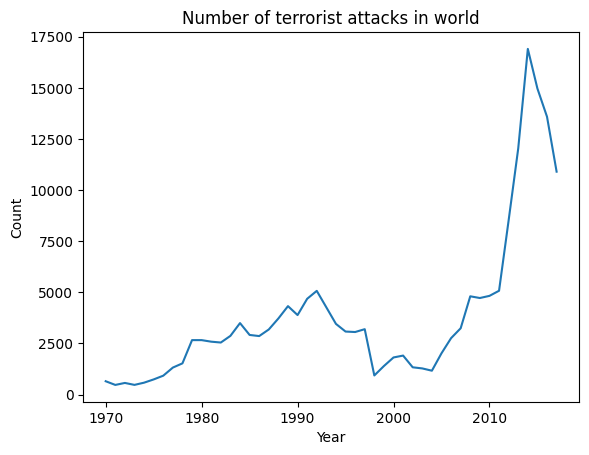

In [14]:
import seaborn as sns
# plt.figure(figsize=(20,30))
sns.lineplot(x='iyear', y='count', data=attacks)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of terrorist attacks in world')
plt.show()

In [15]:
type_attacks = df.groupby(['country_txt','nkill']).size().reset_index(name='count').sort_values(by='count',ascending=True)

### Analyzing the Top Countries With Highest Number of Kills Through Terrorist Attacks 

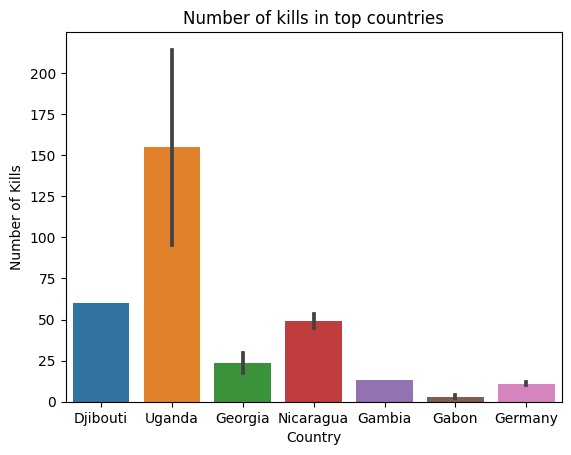

In [16]:

sns.barplot(x='country_txt', y='nkill', data=type_attacks.head(20))
plt.xlabel('Country')
plt.ylabel('Number of Kills')
plt.title('Number of kills in top countries')
plt.show()

In [17]:
highest_attacks = df.groupby(['country_txt']).size().reset_index(name='count').sort_values(by='count',ascending=False)

### Top Countries with Highest Number of Terrorist Attacks

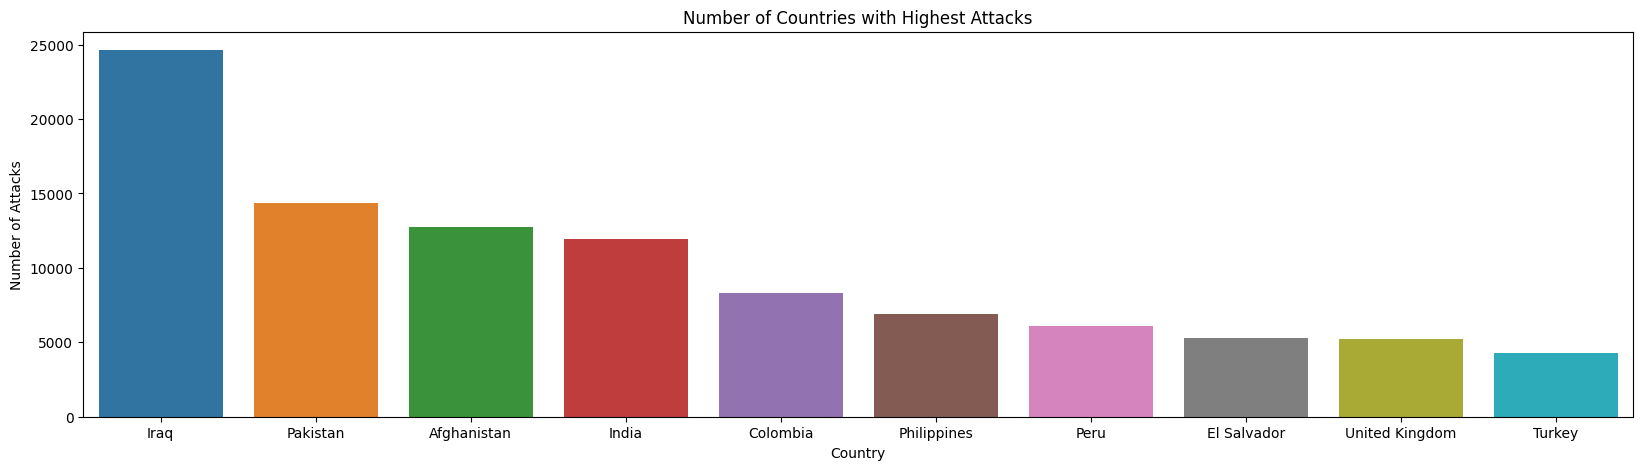

In [18]:
plt.figure(figsize=(20,5))
sns.barplot(x='country_txt', y='count', data=highest_attacks.head(10))
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Number of Countries with Highest Attacks')
plt.show()

In [19]:
year = df.groupby(['iyear','country_txt']).size().reset_index(name='count').sort_values(by='count',ascending=False)

### Countries With Highest Attacks Over the Years

<Figure size 2000x1000 with 0 Axes>

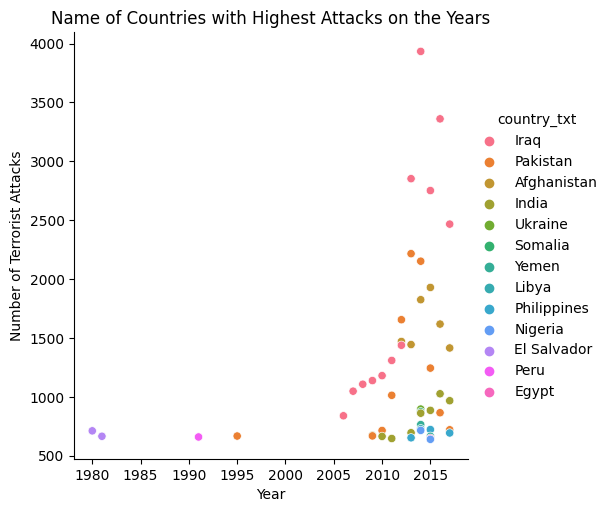

In [20]:
plt.figure(figsize=(20,10))
sns.relplot(x='iyear', y='count',hue='country_txt' ,data=year.head(50))
plt.xlabel('Year')
plt.ylabel('Number of Terrorist Attacks')
plt.title('Name of Countries with Highest Attacks on the Years')
plt.show()

In [21]:
success = df.groupby(['success']).size().reset_index(name='count').sort_values(by='count',ascending=False)

### Success Rates of The Attacks

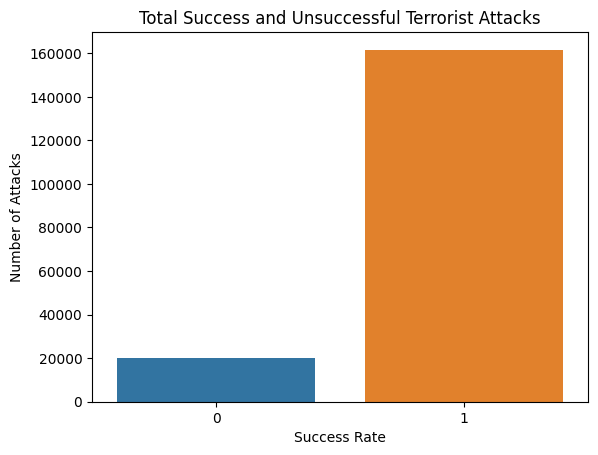

In [22]:

sns.barplot(x='success', y='count',data=success.head(50))
plt.xlabel('Success Rate')
plt.ylabel('Number of Attacks')
plt.title('Total Success and Unsuccessful Terrorist Attacks')
plt.show()

In [23]:
methods = df.groupby(['success','attacktype1_txt']).size().reset_index(name='count').sort_values(by='count',ascending=False)

### Analyzing the Success Rates of Different Attacking Types

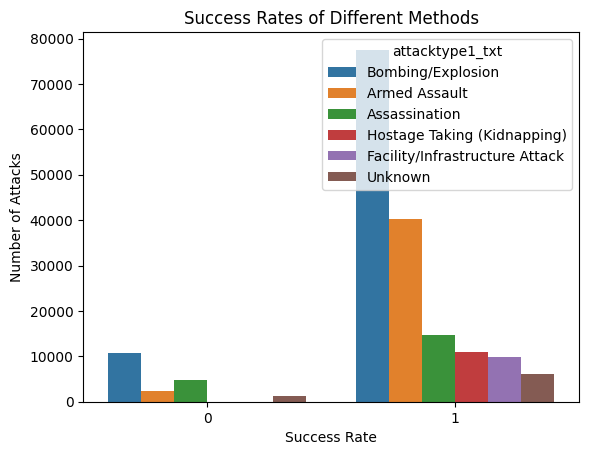

In [24]:
sns.barplot(x='success', y='count',hue='attacktype1_txt', data=methods.head(10))
plt.xlabel('Success Rate')
plt.ylabel('Number of Attacks')
plt.title('Success Rates of Different Methods')
plt.show()

## Building Our Machine Learning Model

In [25]:
df.head(20)

,eventid,iyear,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill,success
0,1.970000e+11,1970,7,2,Dominican Republic,Central America & Caribbean,0,Assassination,Private Citizens & Property,Julio Guzman,1.0,1
1,1.970000e+11,1970,0,0,Mexico,North America,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0,1
2,1.970010e+11,1970,1,0,Philippines,Southeast Asia,0,Assassination,Journalists & Media,Employee,1.0,1
3,1.970010e+11,1970,1,0,Greece,Western Europe,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,0.0,1
4,1.970010e+11,1970,1,0,Japan,East Asia,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,0.0,1
5,1.970010e+11,1970,1,1,United States,North America,0,Armed Assault,Police,Cairo Police Headquarters,0.0,1
6,1.970010e+11,1970,1,2,Uruguay,South America,0,Assassination,Police,Juan Maria de Lucah/Chief of Directorate of in...,0.0,0
7,1.970010e+11,1970,1,2,United States,North America,0,Bombing/Explosion,Utilities,Edes Substation,0.0,1
8,1.970010e+11,1970,1,2,United States,North America,0,Facility/Infrastructure Attack,Military,"R.O.T.C. offices at University of Wisconsin, M...",0.0,1
9,1.970010e+11,1970,1,3,United States,North America,0,Facility/Infrastructure Attack,Government (General),Selective Service Headquarters in Madison Wisc...,0.0,1


### Label encoding the Object Type Values

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
df['country_txt'] = le.fit_transform(df['country_txt'])
df['region_txt'] = le.fit_transform(df['region_txt'])
df['attacktype1_txt'] = le.fit_transform(df['attacktype1_txt'])
df['targtype1_txt'] = le.fit_transform(df['targtype1_txt'])

#### Fresh Dataset

In [28]:
df.head(20)

,eventid,iyear,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill,success
0,1.970000e+11,1970,7,2,47,1,0,1,13,Julio Guzman,1.0,1
1,1.970000e+11,1970,0,0,116,6,0,6,5,"Nadine Chaval, daughter",0.0,1
2,1.970010e+11,1970,1,0,140,9,0,1,7,Employee,1.0,1
3,1.970010e+11,1970,1,0,68,11,0,2,5,U.S. Embassy,0.0,1
4,1.970010e+11,1970,1,0,90,3,0,3,5,U.S. Consulate,0.0,1
5,1.970010e+11,1970,1,1,189,6,0,0,12,Cairo Police Headquarters,0.0,1
6,1.970010e+11,1970,1,2,190,7,0,1,12,Juan Maria de Lucah/Chief of Directorate of in...,0.0,0
7,1.970010e+11,1970,1,2,189,6,0,2,20,Edes Substation,0.0,1
8,1.970010e+11,1970,1,2,189,6,0,3,9,"R.O.T.C. offices at University of Wisconsin, M...",0.0,1
9,1.970010e+11,1970,1,3,189,6,0,3,6,Selective Service Headquarters in Madison Wisc...,0.0,1


#### Initializing the labels

In [29]:
x = df[['country_txt','region_txt','attacktype1_txt','targtype1_txt','nkill']]

In [30]:
x.head() # top 5 rows of x

,country_txt,region_txt,attacktype1_txt,targtype1_txt,nkill
0,47,1,1,13,1.0
1,116,6,6,5,0.0
2,140,9,1,7,1.0
3,68,11,2,5,0.0
4,90,3,3,5,0.0


#### Initializing the target variable

In [31]:
y = df['success']

In [32]:
y.head() # top 5 rows of y

0    1
1    1
2    1
3    1
4    1
Name: success, dtype: int64

#### Splitting the labels and target to training and testing data

In [33]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

#### shape of training and testing dataset

In [34]:
xtrain.shape , ytrain.shape , xtest.shape , ytest.shape 

((145352, 5), (145352,), (36339, 5), (36339,))

### At first using Logistic Regression to train our model

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [36]:
model.fit(xtrain,ytrain) # fitting the xtrain and ytrain

LogisticRegression()

#### Getting the Accuracy of the Logistic regression Model

In [37]:
acc = model.score(xtest, ytest) 
print(f'Accuracy : {acc}')

Accuracy : 0.8905308346404689


#### using StandardScaler To Improve the Score

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
xtrain_new = scaler.fit_transform(xtrain)
xtest_new = scaler.transform(xtest)

In [40]:
model.fit(xtrain_new,ytrain)

LogisticRegression()

In [41]:
acc2 = model.score(xtest_new,ytest)
print(f'Accuracy : {acc2}') 

Accuracy : 0.8905308346404689


#### We can see that it didn't improve our Score

#### So let's try different Model like DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10,random_state=42)

#### fitting the model with xtrain, ytrain

In [43]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [44]:
acc3 = clf.score(xtest,ytest)
print(f'Accuracy : {acc3}')

Accuracy : 0.9216544208701395


#### We can see that the accuracy has Increased so we will choose This as our training model

In [45]:
ypred = model.predict(xtest) # getting the predicted values for our testing set

#### Lets view our Confusion Matrix for the model

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ypred, ytest)

array([[ 3532, 24332],
       [  446,  8029]], dtype=int64)